In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("D:\YUKTA\Assignment\DS\XGBM & LGBM\Titanic_train.csv")
test = pd.read_csv("D:\YUKTA\Assignment\DS\XGBM & LGBM\Titanic_test.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA - Traning data

In [6]:
data.shape

(891, 12)

In [7]:
test.shape

(418, 11)

**Missing values:**

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Dropping the columns which are not necessary:
data.drop(["PassengerId", "Name", "Ticket"], inplace = True, axis = 1)

In [10]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [11]:
# Summary for the train data
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Handling Missing Values:**

In [12]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

For **age group** column there are 177 missing values Replacing the missing values based on the median age values for each passenger class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

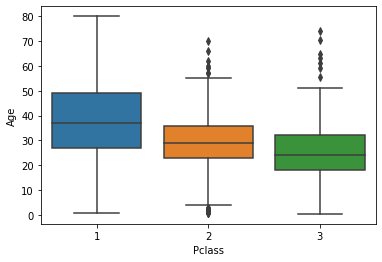

In [13]:
sns.boxplot(x='Pclass',y='Age',data=data)

The median of Pclass1 = 37, Pclass2 = 29 and PClass3 = 24.

In [14]:
def impute_data_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [15]:
data['Age'] = data[['Age','Pclass']].apply(impute_data_age,axis=1)
data['Age'].isnull().sum()

0

For the data values in **Cabin** column there are 687 missing values. Cabins are represented as C85, C123 etc. So dropping the column.

In [16]:
data.drop('Cabin', axis=1, inplace=True)

In case of **Embarked** there are only 2 missing values hence dropping those two observations.

In [17]:
data.dropna(inplace=True)

In [18]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Thus there are no missing values.**

**Verifying Unique values:**

In [19]:
data.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        247
Embarked      3
dtype: int64

In [20]:
#Gender
data['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [21]:
#Survived:
data['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [22]:
#Pclass:
data['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [23]:
#Embarked:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**Visual Representation:**

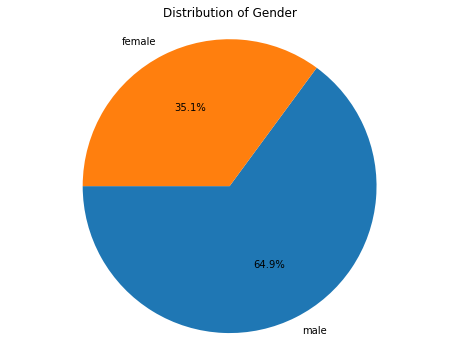

In [24]:
gender_counts = data['Sex'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Gender')
plt.axis('equal') 
plt.show()

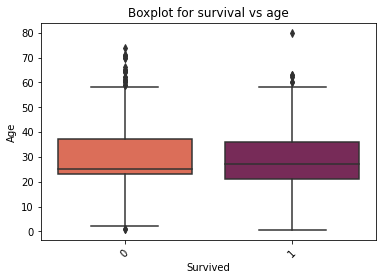

In [25]:
sns.boxplot(x="Survived", y ="Age", data = data, palette = 'rocket_r')

plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Boxplot for survival vs age')
plt.xticks(rotation=45)

plt.show()

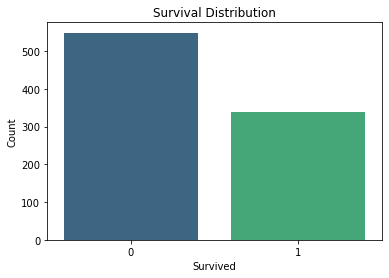

In [26]:
sns.countplot(x="Survived", data = data, palette = 'viridis')

plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Distribution')

plt.show()

Here we can see that number of people survived is less than the number of person died

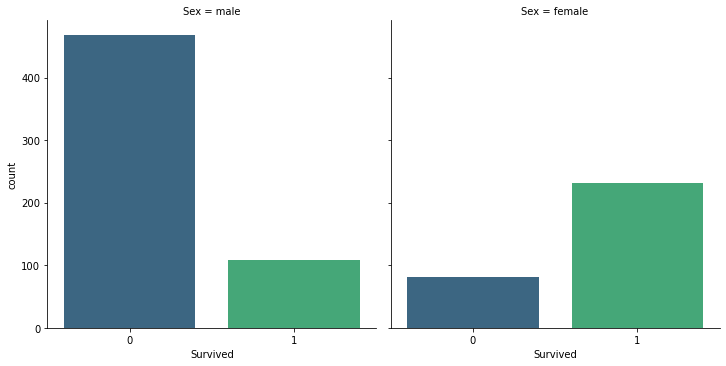

In [27]:
# Survival based on gender
sns.catplot(x='Survived', col='Sex', kind='count', data=data, palette='viridis')

More number of male passengers did not survive whereas people who survived are much likely to be female

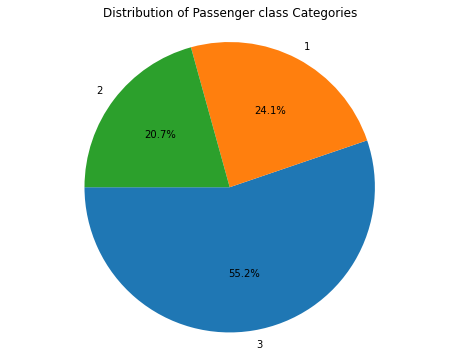

In [28]:
Pclass_counts = data['Pclass'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(Pclass_counts, labels=Pclass_counts.index, autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Passenger class Categories')
plt.axis('equal') 
plt.show()

**55.2%** of the passengers belonged to the passenger **class 3.**

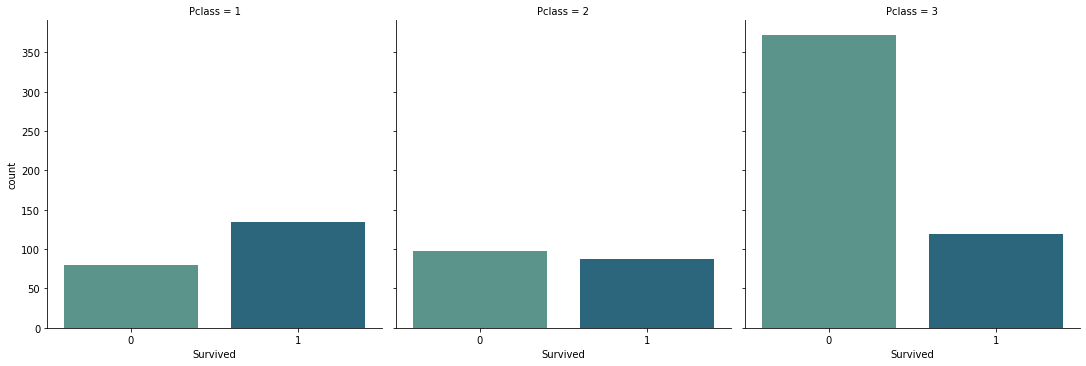

In [29]:
# Survival based on Passenger Class
sns.catplot(x='Survived', col='Pclass', kind='count', data=data, palette='crest')

From the above plot we can see that most of the people who did not survived belonged to passenger class 3

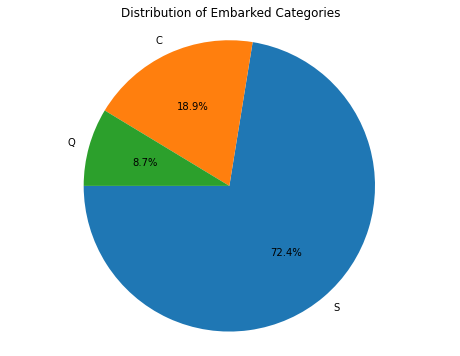

In [30]:
Embarked_counts = data['Embarked'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(Embarked_counts, labels=Embarked_counts.index, autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Embarked Categories')
plt.axis('equal') 
plt.show()

**72.4%** of the passengers boarded from Southampton

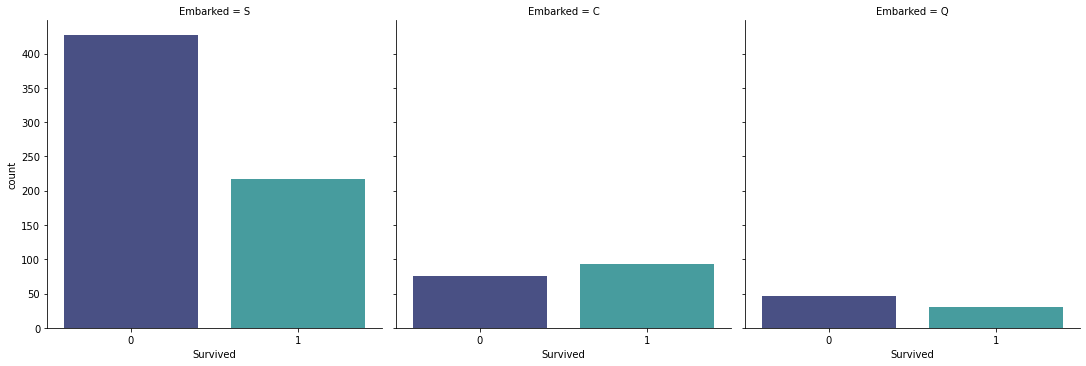

In [31]:
# Survival based on Embarked
sns.catplot(x='Survived', col='Embarked', kind='count', data=data, palette='mako')

Majority of the people boarded from Southampton port could not survived.

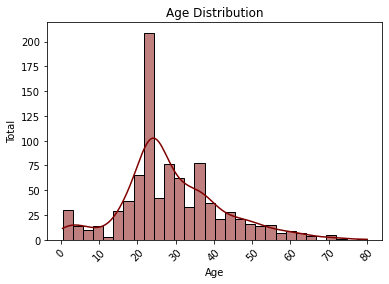

In [32]:
# Visual representation of age:
sns.histplot(data['Age'].dropna(), kde=True, color='maroon', bins=30)

plt.xlabel('Age')
plt.ylabel('Total')
plt.title('Age Distribution')
plt.xticks(rotation=45)

plt.show()

Here we can see that most of the people belonged to age young age group 20-40 years

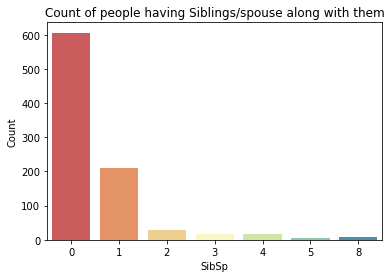

In [33]:
sns.countplot(x='SibSp', data=data, palette='Spectral')

plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('Count of people having Siblings/spouse along with them')
plt.show()

Most of the people travelled did not have sibling or spouse along with them

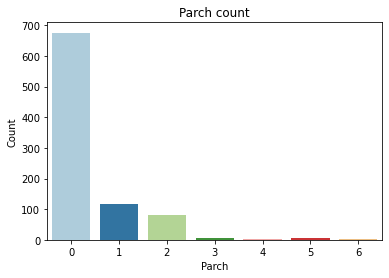

In [34]:
sns.countplot(x='Parch', data=data, palette='Paired')

plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Parch count')
plt.show()

The above visualisation clearly states most of the people travelled didnot have children accompanying them

**Heat map to check correlation:**

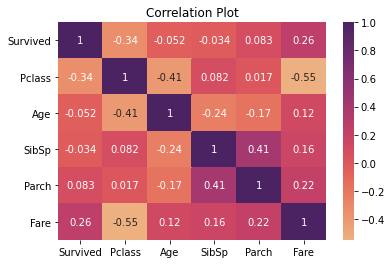

In [35]:
sns.heatmap(data.corr(), annot=True, cmap='flare')

plt.title('Correlation Plot')
plt.show()

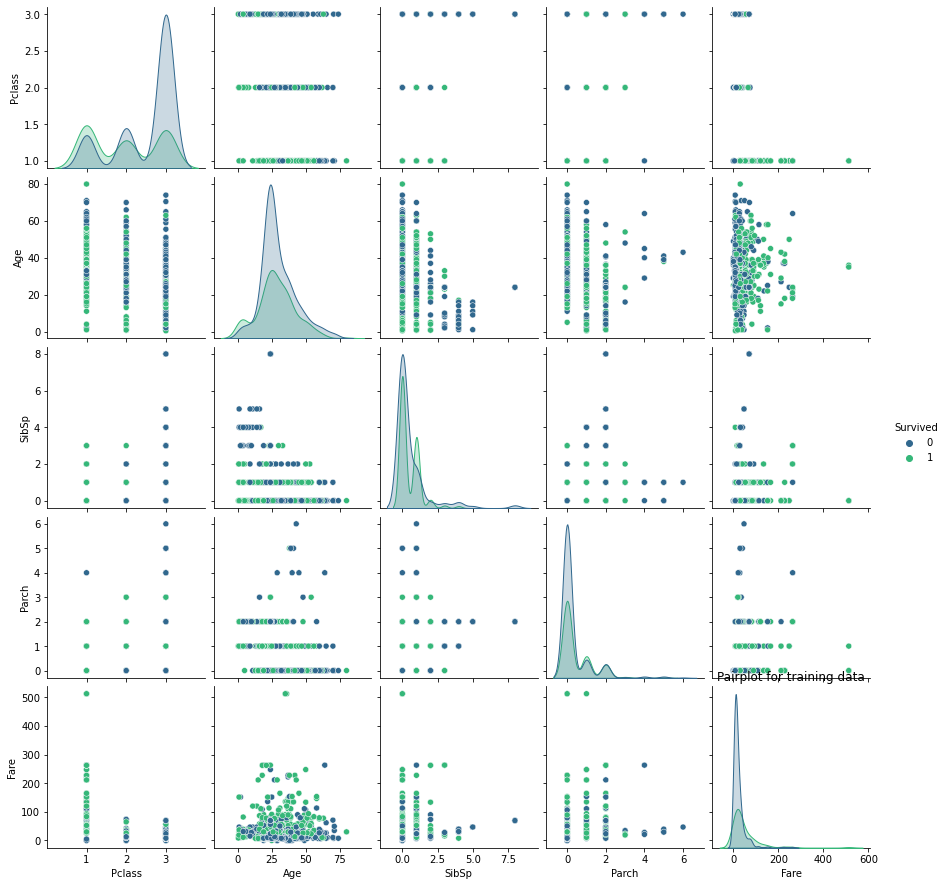

In [36]:
sns.pairplot(data, hue='Survived', palette = 'viridis')

plt.title('Pairplot for training data')
plt.show()

**Encoding Categorical Features**

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
label_encoder = LabelEncoder()

In [39]:
data['Sex'] = label_encoder.fit_transform(data['Sex'])

In [40]:
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [41]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


**Outlier Analysis:**

In [42]:
# Dividing the variables as categorical and numerical variables:-
cat_list=[]
num_list=[]


for i in data.columns:
    unique_values = len(data[i].unique())
    if unique_values<10:
        cat_list.append(i)
    else:
        num_list.append(i)
        

print(cat_list)
print('\n',num_list)

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

 ['Age', 'Fare']


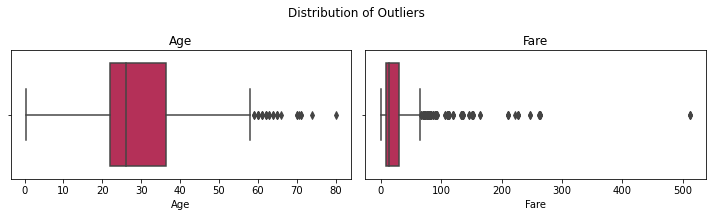

In [43]:
k=1
plt.figure(figsize=(10,5))
plt.suptitle("Distribution of Outliers")

for i in data.loc[:,num_list]:
    plt.subplot(2,2,k)
    sns.boxplot(x = i, data = data.loc[:,num_list], palette = 'rocket_r')
    plt.title(i)
    plt.tight_layout()
    k+=1

In [44]:
# remove outliers;
for i in data.loc[:,num_list]:
    
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim=Q3+1.5 *IQR
    low_lim=Q1-1.5 *IQR
    
    data.loc[data[i]>up_lim,i]=up_lim
    data.loc[data[i]<low_lim,i]=low_lim

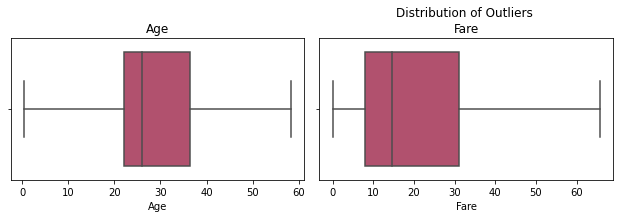

In [45]:
k=1
plt.figure(figsize=(13,13))
plt.suptitle("Distribution of Outliers")

for i in data.loc[:,num_list]:
    plt.subplot(5,3,k)
    sns.boxplot(x = i, data = data.loc[:,num_list], palette = 'flare')
    plt.title(i)
    plt.tight_layout()
    k+=1

**Thus the data has no outliers.**

# Train-Test splitting:

In [46]:
x = data.drop('Survived', axis = 1)
y = data['Survived']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

# LightGBM and XGBoost algorithms:

In [49]:
#!pip install --user lightgbm xgboost

In [50]:
import lightgbm as lgb
import xgboost as xgb

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [52]:
import warnings
warnings.filterwarnings("ignore")

**LightGBM:**

In [53]:
# Creating the LightGBM dataset
train_data = lgb.Dataset(x_train, label=y_train)

In [54]:
# Defining the parameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

In [55]:
# Training the LightGBM model
lgbm_model = lgb.train(params, train_data, num_boost_round=100)

[LightGBM] [Info] Number of positive: 272, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382560 -> initscore=-0.478697
[LightGBM] [Info] Start training from score -0.478697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [56]:
# Making predictions
lgbm_predictions = lgbm_model.predict(x_test)
lgbm_predictions = [1 if pred > 0.5 else 0 for pred in lgbm_predictions]

**XGBoost:**

In [57]:
# Creating the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [58]:
# Training the XGBoost model
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [59]:
# Making predictions
xgb_predictions = xgb_model.predict(x_test)

**Evaluating the model:**

In [60]:
# Evaluating the LightGBM model
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)
lgbm_precision = precision_score(y_test, lgbm_predictions)
lgbm_recall = recall_score(y_test, lgbm_predictions)
lgbm_f1 = f1_score(y_test, lgbm_predictions)

In [61]:
# Evaluating the XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)

In [62]:
# Preparing a Data frame for final results:
result = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [lgbm_accuracy, xgb_accuracy],
    'Precision': [lgbm_precision, xgb_precision],
    'Recall': [lgbm_recall, xgb_recall],
    'F1_score': [lgbm_f1, xgb_f1]  
})

In [63]:
print('Comparison of Results:')
result

Comparison of Results:


,Model,Accuracy,Precision,Recall,F1_score
0,LightGBM,0.814607,0.746479,0.779412,0.762590
1,XGBoost,0.825843,0.753425,0.808824,0.780142


# CONCLUSION:

**Based on the evaluation metrics provided for the LightGBM and XGBoost models we can say that:**

1) The XGBoost model has a slightly higher accuracy (0.825843) compared to the LightGBM model (0.814607). This indicates that the XGBoost model correctly predicts a higher proportion of total instances.

2) Precision for XGBoost (0.753425) is marginally higher than for LightGBM (0.746479). This means that XGBoost has a slightly better performance in terms of correctly identifying true positive cases among the predicted positives.

3) Overall, **the XGBoost model outperforms the LightGBM model** across all evaluated metrics (accuracy, precision, recall, and F1-score). 

# Cross validation and Hyperparameter tuning:

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
# Define the parameter grid for LightGBM
lgb_param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}

**For LightGBM:**

In [66]:
# Create the LightGBM model
lgb_model = lgb.LGBMClassifier()

In [67]:
# Perform GridSearchCV to tune hyperparameters
lgb_grid_search = GridSearchCV(estimator=lgb_model, param_grid=lgb_param_grid, cv=5, scoring='accuracy')
lgb_grid_search.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 217, number of negative: 351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 568, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382042 -> initscore=-0.480889
[LightGBM] [Info] Start training from score -0.480889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381371 -> initscore=-0.483734
[LightGBM] [Info] Start training from score -0.483734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383128 -> initscore=-0.476291
[LightGBM] [Info] Start training from score -0.476291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383128 -> initscore=-0.476291
[LightGBM] [Info] Start training from score -0.476291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 217, number of negative: 351
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 568, number of u

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383128 -> initscore=-0.476291
[LightGBM] [Info] Start training from score -0.476291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 159
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383128 -> initscore=-0.476291
[LightGBM] [Info] Start training from score -0.476291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383128 -> initscore=-0.476291
[LightGBM] [Info] Start training from score -0.476291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200], 'num_leaves': [31, 50]},
             scoring='accuracy')

In [68]:
# Get the best parameters and best score
lgb_best_params = lgb_grid_search.best_params_
lgb_best_score = lgb_grid_search.best_score_

In [69]:
print('LightGBM Best Parameters:\n', lgb_best_params)
print('\nLightGBM Best Cross-Validation Accuracy:\n', lgb_best_score)

LightGBM Best Parameters:
 {'learning_rate': 0.01, 'n_estimators': 100, 'num_leaves': 31}

LightGBM Best Cross-Validation Accuracy:
 0.8284250960307299


In [70]:
# Use the best model to predict
lgb_best_model = lgb_grid_search.best_estimator_
lgbm_predictions = lgb_best_model.predict(x_test)

**For XGBoost:**

In [71]:
# Define the parameter grid for XGBoost
xgb_param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200]
}

In [72]:

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [73]:
# Perform GridSearchCV to tune hyperparameters
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [74]:
# Get the best parameters and best score
xgb_best_params = xgb_grid_search.best_params_
xgb_best_score = xgb_grid_search.best_score_

In [75]:
print('XGBoost Best Parameters:\n', xgb_best_params)
print('\nXGBoost Best Cross-Validation Accuracy:\n', xgb_best_score)

XGBoost Best Parameters:
 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

XGBoost Best Cross-Validation Accuracy:
 0.8312616960504284


In [76]:
# Use the best model to predict
xgb_best_model = xgb_grid_search.best_estimator_
xgb_predictions = xgb_best_model.predict(x_test)

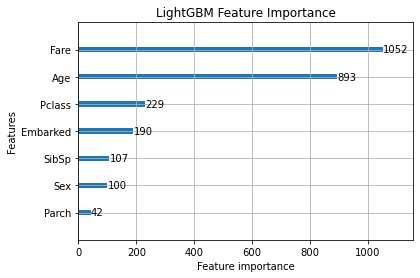

In [77]:
# Plot feature importance for LightGBM
lgb.plot_importance(lgb_best_model, max_num_features=10)
plt.title('LightGBM Feature Importance')
plt.show()

According to the LightGBM best model we can say that variables **Fare, Age and Pclass** are the important features while predicting the survival variable.

In [80]:
from xgboost import plot_importance

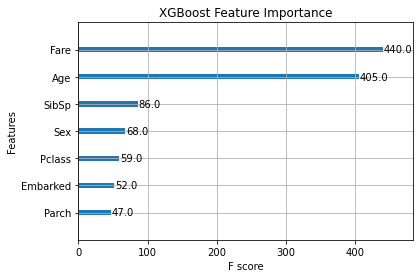

In [81]:
# Plot feature importance for XGBoost
plot_importance(xgb_best_model, max_num_features=10)
plt.title('XGBoost Feature Importance')
plt.show()

According to the XGBoost best model the variables **Fare, Age and SibSp** are important features while predicting the survival variable.

**Evaluating the Best Model:**

In [82]:
# Evaluating the best LightGBM model
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)
lgbm_precision = precision_score(y_test, lgbm_predictions)
lgbm_recall = recall_score(y_test, lgbm_predictions)
lgbm_f1 = f1_score(y_test, lgbm_predictions)

# Evaluating the best XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)

In [83]:
result_best_model = pd.DataFrame({
    'Model': ['LightGBM_best_model', 'XGBoost_best_model'],
    'Accuracy': [lgbm_accuracy, xgb_accuracy],
    'Precision': [lgbm_precision, xgb_precision],
    'Recall': [lgbm_recall, xgb_recall],
    'F1_score': [lgbm_f1, xgb_f1]  
})

In [84]:
print('Comparison of Results for Best Model:')
result_best_model

Comparison of Results for Best Model:


,Model,Accuracy,Precision,Recall,F1_score
0,LightGBM_best_model,0.820225,0.800000,0.705882,0.750000
1,XGBoost_best_model,0.792135,0.738462,0.705882,0.721805


# Conclusion:

1) LightGBM_best_model has a higher accuracy (0.820225) compared to the XGBoost_best_model (0.792135). This indicates that the LightGBM model correctly predicts a higher proportion of total instances.

2) LightGBM_best_model achieves higher precision (0.800000) than XGBoost_best_model (0.738462). This means that LightGBM is more effective in terms of correctly identifying true positive cases among the predicted positives.

3) According to the LightGBM best model we can say that variables **Fare, Age and Pclass** are the important features while predicting the survival variable.

4) According to the XGBoost best model the variables **Fare, Age and SibSp** are important features while predicting the survival variable.

5) Thus in case of best model **LightGBM_best_model outperforms XGBoost_best_model** in terms of accuracy, precision, and F1-score, while both models have the same recall.

# Analysis for Test Data (New data):

# EDA 

In [85]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


There is no survival data in the test dataset

In [86]:
test.shape

(418, 11)

**Missing value**

In [87]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [88]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [89]:
test.drop(["PassengerId", "Name", "Ticket","Cabin"], inplace = True, axis = 1)

In [90]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


**Handling missing values:**

For age group column there are 86 missing values Replacing the missing values based on the median age values for each passenger class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

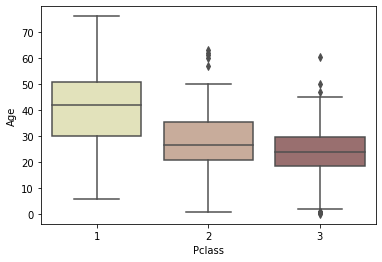

In [91]:
sns.boxplot(x='Pclass',y='Age',data=test,palette='pink_r')

The median of Pclass1 = 42, Pclass2 = 27 and PClass3 = 25.

In [92]:
def impute_test_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 27

        else:
            return 25

    else:
        return Age

In [93]:
test['Age'] = test[['Age','Pclass']].apply(impute_test_age,axis=1)

Column Fare is having only one missing value, so we can drop that observation

In [94]:
null_columns=test.columns[test.isnull().any()]
row_num = (test[test["Fare"].isnull()][null_columns])
row_num

,Fare
152,NaN


In [95]:
test.iloc[152, :]

Pclass         3
Sex         male
Age         60.5
SibSp          0
Parch          0
Fare         NaN
Embarked       S
Name: 152, dtype: object

Missing value of Fare belong to a male passenger from Pclass 3 and age is 60.5

<AxesSubplot:xlabel='Fare', ylabel='Count'>

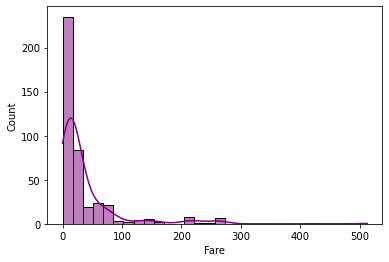

In [96]:
sns.histplot(test['Fare'].dropna(),kde=True,color='purple',bins=30)

From the plot it is clear, Fare is skewed toward lower value, so we can go for median.

In [97]:
Fare_median = test["Fare"].median()
Fare_median

14.4542

In [98]:
test = test.replace(np.NaN,14.4542)

In [99]:
test.iloc[152, :]

Pclass            3
Sex            male
Age            60.5
SibSp             0
Parch             0
Fare        14.4542
Embarked          S
Name: 152, dtype: object

In [100]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Thus the test data has no missing values:**

**Verifying Unique values:**

In [101]:
#Pclass:
test['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [102]:
#Embarked:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

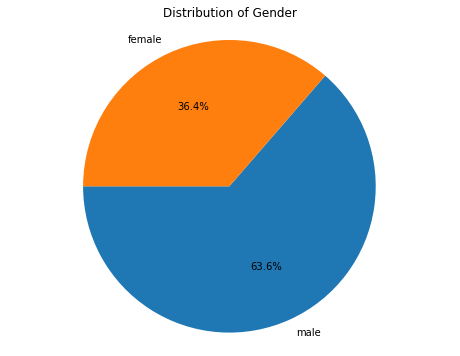

In [103]:
gender_counts = test['Sex'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Gender')
plt.axis('equal') 
plt.show()

The test data has 63.6% of males and 36.4% of females 

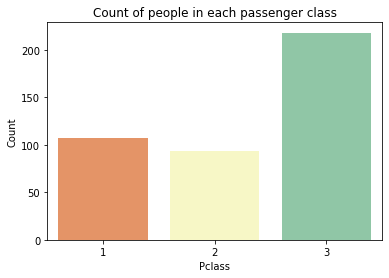

In [104]:
sns.countplot(x='Pclass', data=test, palette='Spectral')

plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Count of people in each passenger class')
plt.show()

Here maximum number of people belong to passenger class 3

**Encoding Categorical Features**

In [105]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

test['Sex'] = label_encoder.fit_transform(test['Sex'])
test['Embarked'] = label_encoder.fit_transform(test['Embarked'])

In [106]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [107]:
new_data = test

In [108]:
new_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


**Making predictions for new data using the best LGBM and XGBM model:**

In [109]:
# Predicting the 'Survived' variable for new data using the best LightGBM model
lgbm_new_predictions = lgb_best_model.predict(new_data)
print('LightGBM Predictions for New Data:', lgbm_new_predictions)

LightGBM Predictions for New Data: [0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 0]


In [110]:
# Predicting the 'Survived' variable for new data using the best XGBoost model
xgb_new_predictions = xgb_best_model.predict(new_data)
print('XGBoost Predictions for New Data:', xgb_new_predictions)

XGBoost Predictions for New Data: [0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 0 0 1 0 0 0]


In [111]:
# Adding the survivial prediction in new data:
new_data['survived_lgbm'] = lgbm_new_predictions
new_data['survived_XGBoost'] = xgb_new_predictions

In [112]:
print('Final Predictions made on New Data:\n')
new_data

Final Predictions made on New Data:



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,survived_lgbm,survived_XGBoost
0,3,1,34.5,0,0,7.8292,1,0,0
1,3,0,47.0,1,0,7.0000,2,0,0
2,2,1,62.0,0,0,9.6875,1,0,0
3,3,1,27.0,0,0,8.6625,2,0,0
4,3,0,22.0,1,1,12.2875,2,0,0
...,...,...,...,...,...,...,...,...,...
413,3,1,25.0,0,0,8.0500,2,0,0
414,1,0,39.0,0,0,108.9000,0,1,1
415,3,1,38.5,0,0,7.2500,2,0,0
416,3,1,25.0,0,0,8.0500,2,0,0
